In [13]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

### Convert txt file to csv dataset

In [5]:
file_path = '../Datasets/Dataset02/GSE160308_human_retina_DR_smallRNA_counts.txt'

df = pd.read_csv(file_path, index_col=0).T

df.to_csv('../Datasets/Dataset02/data0.csv')
df.head()

mirbaseID  hsa-let-7a-2-3p  hsa-let-7a-3p  hsa-let-7a-5p  hsa-let-7b-3p  \
sample_01              5.0         958.34     1669011.08         574.75   
sample_02              3.0        1224.84     1113228.84         608.25   
sample_03              3.0        1575.00      548076.06         466.50   
sample_04             10.0        3659.66     1193248.35        1315.50   
sample_05              7.0        2647.16      861134.44        1095.50   

mirbaseID  hsa-let-7b-5p  hsa-let-7c-3p  hsa-let-7c-5p  hsa-let-7d-3p  \
sample_01      452902.16          142.0      203795.00         1128.0   
sample_02      294703.75          107.0      120300.83          513.0   
sample_03      124670.91           79.0       42925.42          688.0   
sample_04      287310.08          204.5       96194.33         1983.5   
sample_05      207922.00          227.0       70847.75         1407.0   

mirbaseID  hsa-let-7d-5p  hsa-let-7e-3p  ...  hsa-miR-95-3p  hsa-miR-95-5p  \
sample_01       51569.17          336.0  ...       13823.00           3.00   
sample_02       34112.08          327.5  ...       10677.92           4.58   
sample_03       15141.50          239.0  ...        9154.00           6.00   
sample_04       35249.75          449.0  ...       22962.08          11.25   
sample_05       21116.75          274.0  ...       15186.50           6.08   

mirbaseID  hsa-miR-96-3p  hsa-miR-96-5p  hsa-miR-98-3p  hsa-miR-98-5p  \
sample_01         178.00      546661.58           84.0       26149.75   
sample_02         192.00      532109.42          116.0       16161.25   
sample_03         120.00      224765.08          192.0        7975.25   
sample_04         482.50      347113.67          416.5       14910.08   
sample_05         467.75      313103.42          237.5        8760.25   

mirbaseID  hsa-miR-99a-3p  hsa-miR-99a-5p  hsa-miR-99b-3p  hsa-miR-99b-5p  
sample_01           961.0        33780.75         2046.50        63969.33  
sample_02          1092.5        28751.00         1701.00        45678.00  
sample_03           828.5        10081.00         1179.00        31434.50  
sample_04          1420.0        21588.00         2726.00        73796.67  
sample_05          1288.0        12593.00         1812.33        52620.83  

[5 rows x 2576 columns]

### Combine data with target

In [6]:
df = pd.read_csv('../Datasets/Dataset02/data0.csv', index_col=0)
df_target = pd.read_csv('../Datasets/Dataset02/Diagnosis.csv', index_col=0)

df['Diagnosis'] = df_target
df.to_csv('../Datasets/Dataset02/data1.csv')

# Preprocessing

### Import Dataset

In [7]:
df = pd.read_csv("../Datasets/Dataset02/data1.csv", index_col=0)
df.head()

hsa-let-7a-2-3p  hsa-let-7a-3p  hsa-let-7a-5p  hsa-let-7b-3p  \
sample_01              5.0         958.34     1669011.08         574.75   
sample_02              3.0        1224.84     1113228.84         608.25   
sample_03              3.0        1575.00      548076.06         466.50   
sample_04             10.0        3659.66     1193248.35        1315.50   
sample_05              7.0        2647.16      861134.44        1095.50   

           hsa-let-7b-5p  hsa-let-7c-3p  hsa-let-7c-5p  hsa-let-7d-3p  \
sample_01      452902.16          142.0      203795.00         1128.0   
sample_02      294703.75          107.0      120300.83          513.0   
sample_03      124670.91           79.0       42925.42          688.0   
sample_04      287310.08          204.5       96194.33         1983.5   
sample_05      207922.00          227.0       70847.75         1407.0   

           hsa-let-7d-5p  hsa-let-7e-3p  ...  hsa-miR-95-5p  hsa-miR-96-3p  \
sample_01       51569.17          336.0  ...           3.00         178.00   
sample_02       34112.08          327.5  ...           4.58         192.00   
sample_03       15141.50          239.0  ...           6.00         120.00   
sample_04       35249.75          449.0  ...          11.25         482.50   
sample_05       21116.75          274.0  ...           6.08         467.75   

           hsa-miR-96-5p  hsa-miR-98-3p  hsa-miR-98-5p  hsa-miR-99a-3p  \
sample_01      546661.58           84.0       26149.75           961.0   
sample_02      532109.42          116.0       16161.25          1092.5   
sample_03      224765.08          192.0        7975.25           828.5   
sample_04      347113.67          416.5       14910.08          1420.0   
sample_05      313103.42          237.5        8760.25          1288.0   

           hsa-miR-99a-5p  hsa-miR-99b-3p  hsa-miR-99b-5p  Diagnosis  
sample_01        33780.75         2046.50        63969.33          0  
sample_02        28751.00         1701.00        45678.00          0  
sample_03        10081.00         1179.00        31434.50          0  
sample_04        21588.00         2726.00        73796.67          0  
sample_05        12593.00         1812.33        52620.83          0  

[5 rows x 2577 columns]

In [7]:
df.describe()

hsa-let-7a-2-3p  hsa-let-7a-3p  hsa-let-7a-5p  hsa-let-7b-3p  \
count        79.000000      79.000000   7.900000e+01      79.000000   
mean         12.721519    2787.960759   1.260389e+06    1041.149747   
std           7.778894    1554.701890   3.348985e+05     475.824277   
min           3.000000     292.000000   5.480761e+05     312.500000   
25%           7.500000    1466.330000   1.013617e+06     606.000000   
50%          11.000000    2647.160000   1.234320e+06    1022.500000   
75%          16.500000    3832.580000   1.474052e+06    1312.250000   
max          52.000000    7100.840000   2.234117e+06    2626.000000   

       hsa-let-7b-5p  hsa-let-7c-3p  hsa-let-7c-5p  hsa-let-7d-3p  \
count      79.000000      79.000000      79.000000      79.000000   
mean   294007.589241     214.544304  117772.625570    1289.643418   
std     92710.632622      94.060237   49267.559223     504.915863   
min    124670.910000      79.000000   42925.420000     383.000000   
25%    228549.955000     149.250000   85456.420000     971.500000   
50%    274106.000000     192.000000  102896.920000    1284.000000   
75%    333406.745000     269.000000  134870.705000    1602.000000   
max    603506.990000     591.000000  274732.580000    2709.500000   

       hsa-let-7d-5p  hsa-let-7e-3p  ...  hsa-miR-95-5p  hsa-miR-96-3p  \
count      79.000000      79.000000  ...      79.000000      79.000000   
mean    28147.442025     301.164430  ...       7.384430     434.729114   
std      9951.635706     100.448744  ...       4.500208     253.773969   
min     12266.670000     108.000000  ...       0.500000      16.000000   
25%     21254.460000     238.500000  ...       3.915000     263.580000   
50%     25982.670000     294.000000  ...       6.500000     374.330000   
75%     33378.205000     335.665000  ...       9.540000     606.665000   
max     60912.750000     716.000000  ...      22.830000    1169.500000   

       hsa-miR-96-5p  hsa-miR-98-3p  hsa-miR-98-5p  hsa-miR-99a-3p  \
count   7.900000e+01      79.000000      79.000000       79.000000   
mean    4.732471e+05     239.334304   12787.838987     1740.383671   
std     2.534846e+05     143.554715    4932.695702      727.041896   
min     8.609075e+04      30.000000    4730.670000      542.000000   
25%     3.254424e+05     115.000000    9243.705000     1248.500000   
50%     4.280391e+05     218.250000   11418.330000     1620.500000   
75%     5.276342e+05     314.000000   15448.920000     2069.750000   
max     1.685386e+06     655.500000   27793.670000     3634.500000   

       hsa-miR-99a-5p  hsa-miR-99b-3p  hsa-miR-99b-5p  Diagnosis  
count       79.000000       79.000000       79.000000  79.000000  
mean     21194.480886     1894.846709    58562.168228   0.493671  
std      12054.202128      607.081090    16141.507725   0.503155  
min       8314.500000      756.000000    27404.000000   0.000000  
25%      13402.250000     1517.665000    48230.500000   0.000000  
50%      17682.000000     1801.500000    57162.500000   0.000000  
75%      25290.665000     2220.665000    67478.250000   1.000000  
max      73953.830000     4467.500000   125326.500000   1.000000  

[8 rows x 2577 columns]

In [29]:
print(df.dtypes)
df.dtypes.unique()

hsa-let-7a-2-3p    float64
hsa-let-7a-3p      float64
hsa-let-7a-5p      float64
hsa-let-7b-3p      float64
hsa-let-7b-5p      float64
                    ...   
hsa-miR-99a-3p     float64
hsa-miR-99a-5p     float64
hsa-miR-99b-3p     float64
hsa-miR-99b-5p     float64
Diagnosis            int64
Length: 2577, dtype: object


array([dtype('float64'), dtype('int64')], dtype=object)

In [10]:
print(df.isnull().sum())
df.isnull().sum().sum()

hsa-let-7a-2-3p    0
hsa-let-7a-3p      0
hsa-let-7a-5p      0
hsa-let-7b-3p      0
hsa-let-7b-5p      0
                  ..
hsa-miR-99a-3p     0
hsa-miR-99a-5p     0
hsa-miR-99b-3p     0
hsa-miR-99b-5p     0
Diagnosis          0
Length: 2577, dtype: int64


0

In [20]:
df['Diagnosis']

sample_01    0
sample_02    0
sample_03    0
sample_04    0
sample_05    0
            ..
sample_76    1
sample_77    1
sample_78    1
sample_79    1
sample_80    1
Name: Diagnosis, Length: 79, dtype: int64

### Normalize data

In [8]:
scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(df)

df_normalized = pd.DataFrame(X_normalized, columns=df.columns)

df_normalized.to_csv("../Datasets/Dataset02/data2.csv", index=True)

df_normalized.head()

hsa-let-7a-2-3p  hsa-let-7a-3p  hsa-let-7a-5p  hsa-let-7b-3p  \
0         0.040816       0.097864       0.664833       0.113356   
1         0.000000       0.137004       0.335195       0.127837   
2         0.000000       0.188432       0.000000       0.066566   
3         0.142857       0.494601       0.382655       0.433542   
4         0.081633       0.345897       0.185677       0.338448   

   hsa-let-7b-5p  hsa-let-7c-3p  hsa-let-7c-5p  hsa-let-7d-3p  hsa-let-7d-5p  \
0       0.685477       0.123047       0.693980       0.320224       0.807927   
1       0.355096       0.054688       0.333792       0.055878       0.449068   
2       0.000000       0.000000       0.000000       0.131098       0.059097   
3       0.339655       0.245117       0.229798       0.687943       0.472455   
4       0.173861       0.289062       0.120455       0.440146       0.181928   

   hsa-let-7e-3p  ...  hsa-miR-95-5p  hsa-miR-96-3p  hsa-miR-96-5p  \
0       0.375000  ...       0.111957       0.140442       0.287984   
1       0.361020  ...       0.182714       0.152579       0.278885   
2       0.215461  ...       0.246305       0.090160       0.086710   
3       0.560855  ...       0.481415       0.404421       0.163211   
4       0.273026  ...       0.249888       0.391634       0.141945   

   hsa-miR-98-3p  hsa-miR-98-5p  hsa-miR-99a-3p  hsa-miR-99a-5p  \
0       0.086331       0.928720        0.135489        0.387972   
1       0.137490       0.495624        0.178011        0.311345   
2       0.258993       0.140683        0.092643        0.026912   
3       0.617906       0.441374        0.283913        0.202219   
4       0.331735       0.174721        0.241229        0.065182   

   hsa-miR-99b-3p  hsa-miR-99b-5p  Diagnosis  
0        0.347703        0.373411        0.0  
1        0.254614        0.186617        0.0  
2        0.113970        0.041160        0.0  
3        0.530783        0.473769        0.0  
4        0.284610        0.257518        0.0  

[5 rows x 2577 columns]

# Feature Selection

### Select best Feature Selection Algorithm

In [10]:
df = pd.read_csv("../Datasets/Dataset02/data2.csv", index_col=0)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

result_df = pd.DataFrame(
    columns=['Feature Selection Algorithm', 'Feature Count', 'Cross Validation Score'])

feature_counts = [25, 50, 100, 150, 200]

feature_selection_algorithms = [
    ('Information Gain (Mutual info)', mutual_info_classif),
    ('Correlation Coefficient', f_classif),
    ('Chi-Square', chi2),
    ('Feature Importance', RandomForestClassifier().fit(
        X, y).feature_importances_)
]

cv = KFold(n_splits=5, shuffle=True, random_state=42)

for algo_name, algo_func in feature_selection_algorithms:
    for count in feature_counts:
        if algo_name == 'Feature Importance':
            selected_features = X.columns[algo_func.argsort(
            )[-count:][::-1]]
        else:
            selected_features = X.columns[algo_func(
                X, y)[0].argsort()[-count:][::-1]]

        # Use MLPClassifier instead of LogisticRegression
        clf = MLPClassifier(max_iter=1000, random_state=42)
        cv_scores = cross_val_score(
            clf, X[selected_features], y, cv=cv)

        result_df = pd.concat([result_df, pd.DataFrame({
            'Feature Selection Algorithm': [algo_name],
            'Feature Count': [count],
            'Cross Validation Score': [f'{cv_scores.mean():.2f}+/-{cv_scores.std():.2f}']
        })], ignore_index=True)

print(result_df)

c:\Users\ACER\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  38   44   53   54   56   57   59   60   61   71   77   78   85   89
   90   92  107  121  129  136  138  139  141  142  143  144  146  156
  161  203  206  240  245  246  272  293  321  341  345  346  373  374
  375  436  464  465  468  479  486  488  490  492  516  517  523  541
  550  557  568  590  600  604  617  627  636  690  716  723  725  751
  752  754  756  757  758  759  781  783  785  786  788  798  799  807
  834  845  866  890  892  893  894  895  896  897  898  915  916  917
  919  920  921  922  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  949  951  953  955  956  958  959  960  961  962  963  964  965  966
  967  968  969  970  972  973  974  977  978  980  981  982  983  985
  986  990  991  992  994  996  997  998 1001 1002 1003 1004 1006 1013
 1019 1024 1029 1033 1037 10

       Feature Selection Algorithm Feature Count Cross Validation Score
0   Information Gain (Mutual info)            25            0.30+/-0.05
1   Information Gain (Mutual info)            50            0.30+/-0.05
2   Information Gain (Mutual info)           100            0.30+/-0.05
3   Information Gain (Mutual info)           150            0.30+/-0.05
4   Information Gain (Mutual info)           200            0.30+/-0.05
5          Correlation Coefficient            25            0.37+/-0.06
6          Correlation Coefficient            50            0.37+/-0.06
7          Correlation Coefficient           100            0.37+/-0.06
8          Correlation Coefficient           150            0.38+/-0.08
9          Correlation Coefficient           200            0.37+/-0.06
10                      Chi-Square            25            0.37+/-0.06
11                      Chi-Square            50            0.37+/-0.06
12                      Chi-Square           100            0.37

### Check Feature Importance

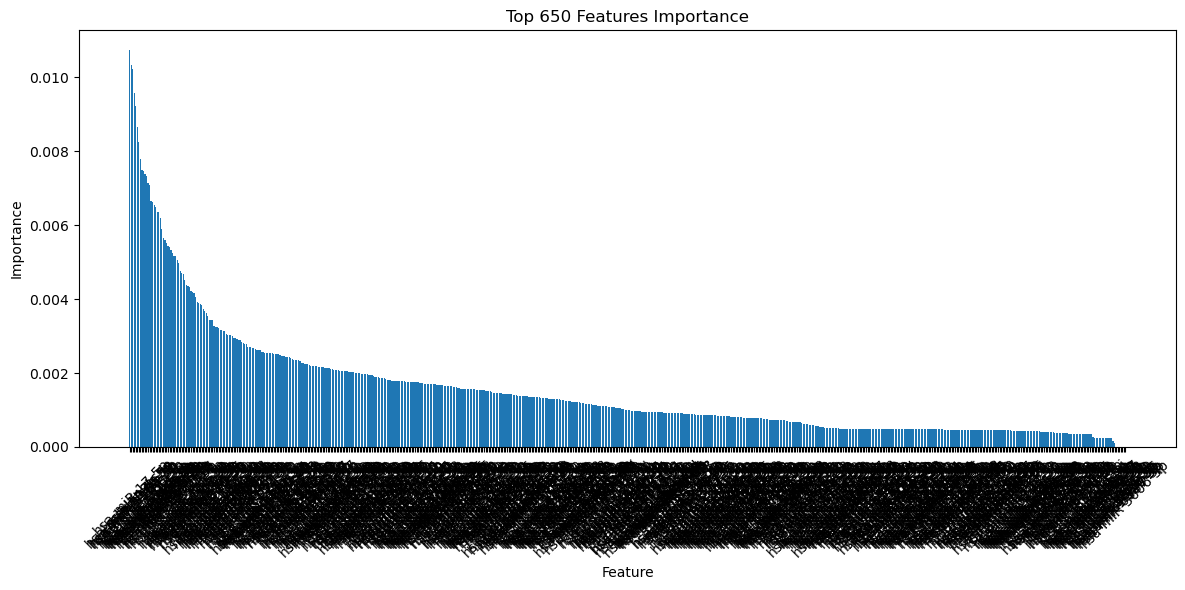

In [38]:
df = pd.read_csv("../Datasets/Dataset02/data2.csv", index_col=0)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

feature_names = X.columns

k_values = [650] 

selected_features_dict = {}

for k in k_values:
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)
    feature_importances = clf.feature_importances_
    selected_features = np.array(feature_names)[
        np.argsort(feature_importances)[::-1][:k]]

    selected_features_dict[k] = selected_features

    sorted_idx = np.argsort(feature_importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title(f"Top {k} Features Importance")
    plt.bar(range(k), feature_importances[sorted_idx][:k], align="center")
    plt.xticks(range(k), np.array(feature_names)[sorted_idx][:k], rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

### Feature Selection

In [12]:
df = pd.read_csv("../Datasets/Dataset02/data2.csv", index_col=0)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

feature_counts = list(range(1, 81))

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

feature_importances = clf.feature_importances_

selected_features = X.columns[np.argsort(feature_importances)[::-1]]

datasets = {}
for count in feature_counts:
    datasets[count] = X[selected_features[:count]].copy()
    datasets[count]['Diagnosis'] = y

for count, dataset in datasets.items():
    dataset.to_csv(
        f'../Datasets/Dataset02/Feature_Select/dataset_{count}.csv', index=True)

## Model Building

### Check CV Score for Different Models

In [41]:
feature_counts = list(range(1, 81))

models = {
    "SVM(linear)": SVC(kernel='linear'),
    "SVM(poly)": SVC(kernel='poly'),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "ANN": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
}

results = pd.DataFrame(
    columns=["Model Name", "Feature Count", "CV Score (Mean +/- Std)"])

for count in feature_counts:
    file_path = f"../Datasets/Dataset02/Feature_Select/dataset_{count}.csv"
    df = pd.read_csv(file_path, index_col=0)

    X = df.drop('Diagnosis', axis=1)
    y = df['Diagnosis']

    for model_name, model in models.items():
        cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
        scores = cross_val_score(model, X, y, cv=cv)
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        result = f"{mean_score:.4f} +/- {std_score:.4f}"
        results = results.append({"Model Name": model_name, "Feature Count": count,
                                 "CV Score (Mean +/- Std)": result}, ignore_index=True)

results.sort_values(by=["CV Score (Mean +/- Std)"], ascending=False, inplace=True)
results.to_csv("../Datasets/Dataset02/Feature_Select/results.csv", index=False)

C:\Users\ACER\AppData\Local\Temp\ipykernel_24932\2251156937.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model Name": model_name, "Feature Count": count,
C:\Users\ACER\AppData\Local\Temp\ipykernel_24932\2251156937.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model Name": model_name, "Feature Count": count,
C:\Users\ACER\AppData\Local\Temp\ipykernel_24932\2251156937.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model Name": model_name, "Feature Count": count,
C:\Users\ACER\AppData\Local\Temp\ipykernel_24932\2251156937.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

In [43]:
df = pd.read_csv("../Datasets/Dataset02/Feature_Select/results.csv")
df.head(10)

Model Name  Feature Count CV Score (Mean +/- Std)
0        ANN             78       0.9500 +/- 0.0468
1        ANN             76       0.9500 +/- 0.0468
2        ANN             74       0.9500 +/- 0.0468
3        ANN             59       0.9500 +/- 0.0468
4        ANN             73       0.9500 +/- 0.0468
5        ANN             72       0.9500 +/- 0.0468
6        ANN             77       0.9500 +/- 0.0468
7        ANN             75       0.9500 +/- 0.0468
8        ANN             79       0.9375 +/- 0.0559
9  SVM(poly)             43       0.9375 +/- 0.0559

### Check Distributions

In [44]:
feature_count = 78

data = pd.read_csv(
    f'../Datasets/Dataset02/Feature_Select/dataset_{feature_count}.csv')

target_column = data.columns[feature_count + 1]

num_rows = math.ceil(feature_count / 4)
num_columns = 4

fig, axes = plt.subplots(num_rows, num_columns, figsize=(80, 140))

for i in range(min(feature_count, num_rows * num_columns)):
    row_index = i // num_columns
    col_index = i % num_columns

    sns.histplot(
        data=data, x=data.columns[i + 1], hue=target_column, kde=True, ax=axes[row_index, col_index])

    axes[row_index, col_index].set_title(
        f'Distribution of {data.columns[i + 1]}')

    axes[row_index, col_index].set_xlabel(data.columns[i + 1])

    axes[row_index, col_index].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

### Check Accuracy

c:\Users\ACER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


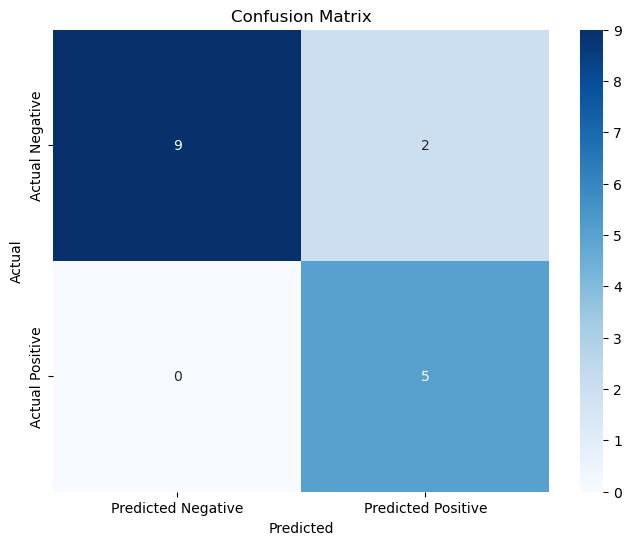

Accuracy: 0.88
Precision: 0.71
Recall (Sensitivity): 1.00
Specificity: 0.82
F1 Score: 0.83


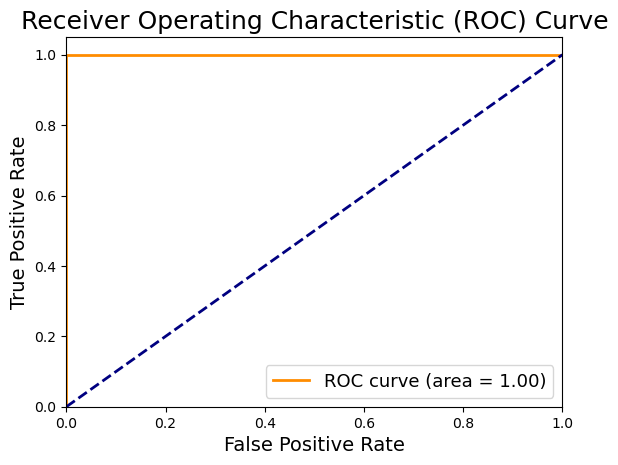

In [16]:
feature_count = 78

df = pd.read_csv(
    f'../Datasets/Dataset02/Feature_Select/dataset_{feature_count}.csv', index_col=0)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = MLPClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
plt.legend(loc='lower right', fontsize=13)
plt.show()